# 处理时间序列(Working with Time Series)
由于 Pandas 最初是为金融模型而创建的,因此它拥有一些功能非常强大的日期、时间、带时间索引数据的处理工具。本节将介绍的日期与时间数据主要包含三类。

* **时间戳**表示某个具体的时间点(例如 2015 年 7 月 4 日上午 7 点)。  
* **时间间隔**与**周期**表示开始时间点与结束时间点之间的时间长度,例如 2015 年(指的是2015 年 1 月 1 日至 2015 年 12 月 31 日这段时间间隔)。周期通常是指一种特殊形式的时间间隔,每个间隔长度相同,彼此之间不会重叠(例如,以 24 小时为周期构成每一天)。  
* **时间增量**(time delta)或**持续时间**(duration)表示精确的时间长度(例如,某程序运行持续时间 22.56 秒)。  

在本节内容中,我们将介绍 Pandas 中的 3 种日期 / 时间数据类型的具体用法。由于篇幅有限,后文无法对 Python 或 Pandas 的时间序列工具进行详细的介绍,仅仅是通过一个宽泛的综述,总结何时应该使用它们。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Python 的日期与时间工具(Dates and Times in Python)
在 Python 标 准 库 与 第 三 方 库 中 有 许 多 可 以 表 示 日 期、 时 间、 时 间 增 量 和 时 间 跨 度 (timespan)的工具。尽管 Pandas 提供的时间序列工具更适合用来处理数据科学问题,但是 了解 Pandas 与 Python 标准库以及第三方库中的其他时间序列工具之间的关联性将大有裨益。

### 1. 原生Python的日期与时间工具 : datetime 与 dateutil(Native Python dates and times: datetime and dateutil)
Python 基本的日期与时间功能都在标准库的 datetime 模块中。如果和第三方库 dateutil模块搭配使用,可以快速实现许多处理日期与时间的功能。例如,你可以用 datetime 类型创建一个日期:

In [2]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

或者使用 dateutil 模块对各种字符串格式的日期进行正确解析:

In [3]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

一旦有了 datetime 对象,就可以进行许多操作了,例如打印出这一天是星期几:

In [4]:
date.strftime('%A')

'Saturday'

datetime 和 dateutil 模块在灵活性与易用性方面都表现出色,你可以用这些对象及其相 应的方法轻松完成你感兴趣的任意操作。但如果你处理的时间数据量比较大,那么速度 就会比较慢。就像之前介绍过的 Python 的原生列表对象没有 NumPy 中已经被编码的数值 类型数组的性能好一样,Python 的原生日期对象同样也没有 NumPy 中已经被编码的日期 (encoded dates)类型数组的性能好。

### 2. 时间类型数组 :NumPy 的 datetime64 类型(Typed arrays of times: NumPy's datetime64)
Python 原生日期格式的性能弱点促使 NumPy 团队为 NumPy 增加了自己的时间序列类型。datetime64 类型将日期编码为 64 位整数,这样可以让日期数组非常紧凑(节省内存)。

datetime64 需要在设置日期时确定具体的输入类型:

In [5]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

但只要有了这个日期格式,就可以进行快速的向量化运算:

In [6]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

因为 NumPy 的 datetime64 数组内元素的类型是统一的,所以这种数组的运算速度会比Python 的 datetime 对象的运算速度快很多,尤其是在处理较大数组时(关于向量化运算的内容已经在 2.3 节介绍过)。

datetime64 与 timedelta64 对 象 的 一 个 共 同 特 点 是, 它 们 都 是 在 **基 本 时 间 单 位**(fundamental time unit)的基础上建立的。由于 datetime64 对象是 64 位精度,所以可编码的时间范围可以是基本单元的 2 64 倍。也就是说, datetime64 在**时间精度**(time resolution)与**最大时间跨度**(maximum time span)之间达成了一种平衡。

比如你想要一个时间纳秒(nanosecond,ns)级的时间精度,那么你就可以将时间编码到0~2 64 纳秒或 600 年之内,NumPy 会自动判断输入时间需要使用的时间单位。例如,下面是一个以天为单位的日期:

In [7]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

而这是一个以分钟为单位的日期:

In [8]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

需要注意的是,时区将自动设置为执行代码的操作系统的当地时区。

你可以通过各种格式的代码设置基本时间单位。例如,将时间单位设置为纳秒:

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

NumPy 的 datetime64 文档(http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html) 总结了所有支持相对与绝对时间跨度的时间与日期单位格式代码,对此总结如下。

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

对于日常工作中的时间数据类型,默认单位都用纳秒 datetime64[ns] ,因为用它来表示时间范围精度可以满足绝大部分需求。

最后还需要说明一点,虽然 datetime64 弥补了 Python 原生的 datetime 类型的不足,但它缺少了许多 datetime (尤其是 dateutil )原本具备的便捷方法与函数

### 3. Pandas的日期与时间工具:理想与现实的最佳解决方案(Dates and times in pandas: best of both worlds)
Pandas 所有关于日期与时间的处理方法全部都是通过 **Timestamp** 对象实现的,它利用numpy.datetime64 的有效存储和向量化接口将 datetime 和 dateutil 的易用性有机结合起来。Pandas 通过一组 Timestamp 对象就可以创建一个可以作为 Series 或 DataFrame 索引的DatetimeIndex ,我们将在后面介绍许多类似的例子。

例如,可以用 Pandas 的方式演示前面介绍的日期与时间功能。我们可以灵活处理不同格式的日期与时间字符串,获取某一天是星期几:

In [10]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Saturday'

另外,也可以直接进行 NumPy 类型的向量化运算:

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

下面将详细介绍 Pandas 用来处理时间序列数据的工具。

## Pandas 时间序列 : 用时间作索引(Pandas Time Series: Indexing by Time)
Pandas 时间序列工具非常适合用来处理带时间戳的索引数据。例如,我们可以通过一个时间索引数据创建一个 Series 对象:

In [13]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

### 索引，选择，取子集(Indexing, Selection, Subsetting)

有了一个带时间索引的 Series 之后,就能用它来演示之前介绍过的 Series 取值方法,可以直接用日期进行切片取值:

In [14]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [15]:
data['2014-07-04':'2015-08-04'] #取到了最后一个

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

另外,还有一些仅在此类 Series 上可用的取值操作,例如**直接通过年份切片获取该年的数据**:

In [16]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

获取某月的数据:

In [17]:
data['2015-07']

2015-07-04    2
dtype: int64

In [18]:
data['20140704':'20150704'] #这样也是可以的，应该是自动解析成时间，毕竟时间是用64位整数存储的

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

### 重复索引的时间序列(Time Series with Duplicate Indices)
在某些数据中，可能会遇到多个数据在同一时间戳下的情况：

In [19]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', 
                          '1/2/2000', '1/3/2000'])

In [20]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

上面数据的索引包含重复的，我们通过is_unique属性来查看index是否是唯一值：

In [21]:
dup_ts.index.is_unique

False

对这个时间序列取索引的的话， 要么得到标量，要么得到切片，这取决于时间戳是否是重复的：

In [22]:
dup_ts['1/3/2000'] # not duplicated

4

In [23]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

假设我们想要聚合那些有重复时间戳的数据，一种方法是用groupby，设定level=0：

In [24]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [25]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

下面将介绍一些示例,体现将日期作为索引为运算带来的便利性。在此之前,让我们仔细看看现有的时间序列数据结构。

## Pandas 时间序列数据结构(Pandas Time Series Data Structures)
本节将介绍 Pandas 用来处理时间序列的基础数据类型。

* 针对**时间戳**数据,Pandas 提供了 **Timestamp** 类型。与前面介绍的一样,它本质上是Python 的原生 datetime 类型的替代品,但是在性能更好的 numpy.datetime64 类型的基础上创建。对应的索引数据结构是 DatetimeIndex 。
* 针对**时间周期**数据,Pandas 提供了 **Period** 类型。这是利用 numpy.datetime64 类型将固定频率的时间间隔进行编码。对应的索引数据结构是 PeriodIndex 。
* 针对**时间增量**或**持续时间**,Pandas 提供了 **Timedelta** 类型。 Timedelta 是一种代替 Python原生 datetime.timedelta 类型的高性能数据结构,同样是基于 numpy.timedelta64 类型。对应的索引数据结构是 TimedeltaIndex 。

最基础的日期 / 时间对象是 Timestamp 和 DatetimeIndex 。这两种对象可以直接使用,最常用的方法是 pd.to_datetime() 函数,它可以解析许多日期与时间格式。对 pd.to_datetime() 传递一个日期会返回一个 Timestamp 类型,传递一个时间序列会返回一个 DatetimeIndex 类型:

In [26]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

任何 DatetimeIndex 类型都可以通过 to_period() 方法和一个频率代码转换成 PeriodIndex类型。下面用 'D' 将数据转换成单日的时间序列:

In [27]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

当用一个日期减去另一个日期时,返回的结果是 TimedeltaIndex 类型:

In [28]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 有规律的时间序列 : pd.date_range() (Regular sequences: pd.date_range())
为了能更简便地创建有规律的时间序列,Pandas 提供了一些方法: pd.date_range() 可以 处理时间戳、 pd.period_range() 可以处理周期、 pd.timedelta_range() 可以处理时间间 隔。我们已经介绍过,Python 的 range() 和 NumPy 的 np.arange() 可以用起点、终点和步 长(可选的)创建一个序列。 pd.date_range() 与之类似,通过开始日期、结束日期和频率 代码(同样是可选的)创建一个有规律的日期序列,默认的频率是天:

In [29]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

此外,日期范围不一定非是开始时间与结束时间,也可以是开始时间与周期数 periods (必须传入一个数字来表示周期):

In [30]:
pd.date_range(start='2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [31]:
pd.date_range(end='2015-07-10', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

date_range会默认保留开始或结束的时间戳：

In [32]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

有些时候我们的时间序列数据带有小时，分，秒这样的信息，但我们想要让这些时间戳全部归一化到午夜（normalized to midnight, 即晚上0点），这个时候要用到normalize选项：

In [33]:
nor_date = pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)
nor_date

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [34]:
nor_date[0]

Timestamp('2012-05-02 00:00:00', freq='D')

你可以通过 freq 参数改变时间间隔,默认值是 D 。例如,可以创建一个按小时变化的时间戳:

In [35]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

**如 果 要 创 建 一 个 有 规 律 的 周 期 或 时 间 间 隔 序 列, 有 类 似 的 函 数 pd.period_range() 和 pd.timedelta_range() 。**

下面是一个以月为周期的示例:

In [36]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

以及一个以小时递增的序列:

In [37]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

掌握 Pandas 频率代码是使用所有这些时间序列创建方法的必要条件。接下来,我们将总结这些代码。

## 时间频率与偏移量(Frequencies and Offsets)
Pandas 时间序列工具的基础是时间频率或偏移量(offset)代码。就像之前见过的 D (day)和 H (hour)代码,我们可以用这些代码设置任意需要的时间间隔。下表总结了主要的频率代码。

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |


| 代码   | 描述        | 代码   | 描述          |
|--------|---------------------|--------|----------------------|
| ``D``  | 天(calendar day,按日历算,含双休日)        | ``B``  | 天(business day,仅含工作日)        |
| ``W``  | 周(weekly)              |        |                      |
| ``M``  | 月末(month end)           | ``BM`` | 月末(business month end,仅含工作日)   |
| ``Q``  | 季末(quarter end)         | ``BQ`` | 季末(business quarter end,仅含工作日) |
| ``A``  | 年末(year end)            | ``BA`` | 年末(business year end,仅含工作日)    |
| ``H``  | 小时(hours)              | ``BH`` | 小时(business hours,工作时间)       |
| ``T``  | 分钟(minutes)             |        |                      |
| ``S``  | 秒(seconds)            |        |                      |
| ``L``  | 毫秒(milliseonds)         |        |                      |
| ``U``  | 微秒(microseconds)        |        |                      |
| ``N``  | 纳秒(nanoseconds)        |        |                      |


月、季、年频率都是具体周期的结束时间(月末、季末、年末),而有一些以 S (start,开始)为后缀的代码表示日期开始(如表 3-8 所示)。

| Code    | Description            | Code    | Description            |
|---------|------------------------|---------|------------------------|
| ``MS``  | Month start            |``BMS``  | Business month start   |
| ``QS``  | Quarter start          |``BQS``  | Business quarter start |
| ``AS``  | Year start             |``BAS``  | Business year start    |


| 代码    | 频率            | 代码    | 频率            |
|---------|------------------------|---------|------------------------|
| ``MS``  | 月初(month start)            |``BMS``  | 月初(business month start,仅含工作日)   |
| ``QS``  | 季初(quarter start)          |``BQS``  | 季初(business quarter start,仅含工作日) |
| ``AS``  | 年初(year start)             |``BAS``  | 年初(business year start,仅含工作日)    |


另外,你可以在频率代码后面加三位月份缩写字母来改变季、年频率的开始时间。  
• Q-JAN 、 BQ-FEB 、 QS-MAR 、 BQS-APR 等。  
• A-JAN 、 BA-FEB 、 AS-MAR 、 BAS-APR 等。  

同理,也可以在后面加三位星期缩写字母来改变一周的开始时间。  
• W-SUN 、 W-MON 、 W-TUE 、 W-WED 等。  

在这些代码的基础上,还可以将频率组合起来创建的新的周期。例如,可以用小时( H )和分钟( T )的组合来实现 2 小时 30 分钟:

In [38]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

所有这些频率代码都对应 Pandas 时间序列的偏移量,具体内容可以在 pd.tseries.offsets模块中找到。例如,可以用下面的方法直接创建一个工作日偏移序列:

In [39]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

**Week of month dates（月中的第几周日期）**

一个有用的类（class）是月中的第几周（Week of month），用WOM表示。例如我们想得到每个月的第三个星期五：

In [40]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

list(rng)

## 重新取样 、 迁移和窗口(Resampling, Shifting, and Windowing)
用日期和时间直观地组织与获取数据是 Pandas 时间序列工具最重要的功能之一。Pandas不仅支持普通索引功能(合并数据时自动索引对齐、直观的数据切片和取值方法等),还专为时间序列提供了额外的操作。

下面让我们用一些股票数据来演示这些功能。由于 Pandas 最初是为金融数据模型服务的,因此可以用它非常方便地获取金融数据。例如, pandas-datareader 程序包(可以通过 conda install pandas-datareader 进行安装)知道如何从一些可用的数据源导入金融数据,包含 Yahoo 财经、Google 财经和其他数据源。下面来导入 Google 的历史股票价格:

In [41]:
"""
from pandas_datareader import data
goog = data.get_data_yahoo('GOOG', start='2004', end='2016')
goog.head()
"""
"""
from pandas_datareader import data
goog = data.get_data_yahoo('GOOG', start='2004', end='2016')
goog.head()
goog.to_csv('data/goog2004-2016.csv',index=1) #保存行索引
"""
goog = pd.read_csv('data/goog2004-2016.csv',index_col='Date', parse_dates=True)
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [42]:
goog.shape

(2863, 6)

出于简化的目的,这里只用收盘价:

In [43]:
goog = goog['Close']

设置 Matplotlib 之后,就可以通过 plot() 画出可视化图:

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

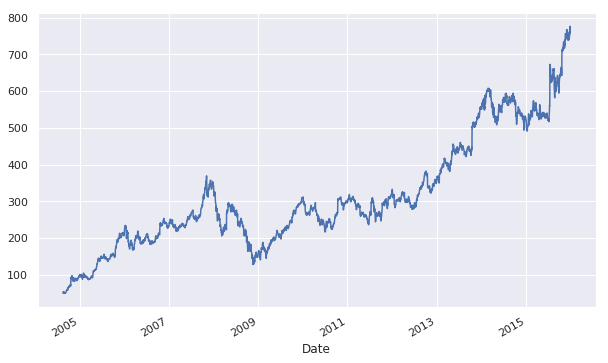

In [45]:
goog.plot(figsize=(10, 6));#Google 收盘价随时间变化的趋势

### 1. 重新取样与频率转换(Resampling and converting frequencies)
处理时间序列数据时,经常需要按照新的频率(更高频率、更低频率)对数据进行重新取样。你可以通过 resample() 方法解决这个问题,或者用更简单的 asfreq() 方法。这两个方法的主要差异在于, resample() 方法是以**数据累计**(data aggregation)为基础,而asfreq() 方法是以**数据选择**(data selection)为基础。

看到 Google 的收盘价之后,让我们用两种方法对数据进行向后取样(down-sample)。这里用年末( ' BA ' ,最后一个工作日)对数据进行重新取样(如图所示):

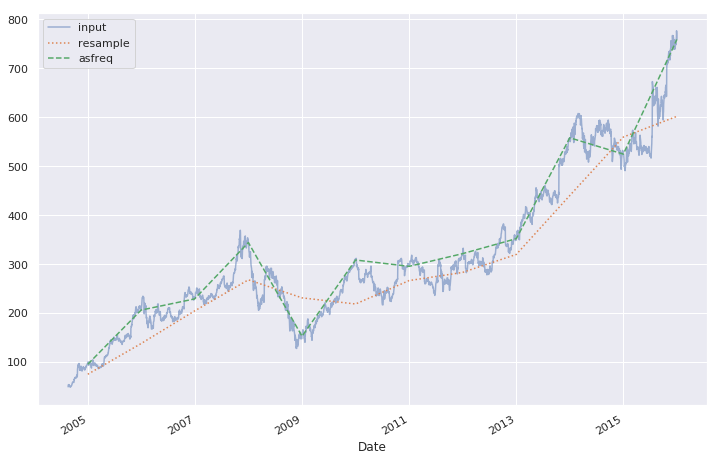

In [46]:
#对 Google 股票收盘价进行重新取样
goog.plot(alpha=0.5, style='-',figsize=(12, 8))
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

请注意这两种取样方法的差异:在每个数据点上, **resample 反映的是上一年的均值**,而**asfreq 反映的是上一年最后一个工作日的收盘价**。

在进行向前取样(up-sampling)时, resample() 与 asfreq() 的用法大体相同,不过重新取样有许多种配置方式。操作时,两种方法都默认将向前取样作为缺失值处理,也就是说在里面填充 NaN 。与前面介绍过的 pd.fillna() 函数类似, asfreq() 有一个 method 参数可以设置填充缺失值的方式。下面将对工作日数据按天进行重新取样(即包含周末),结果如图所示:

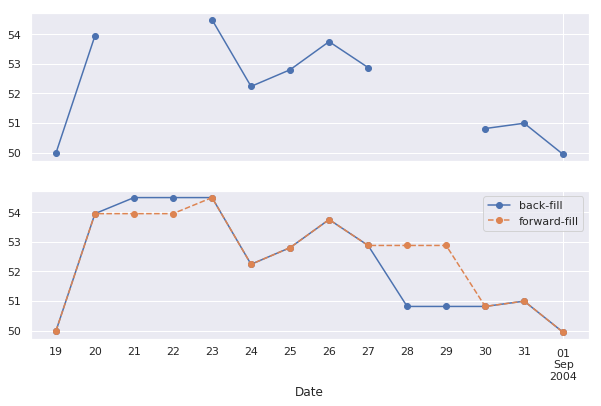

In [47]:
#asfreq() 向前填充与向后填充缺失值的结果对比
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o',figsize=(10, 6))

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

上面那幅图是原始数据:非工作日的股价是缺失值,所以不会出现在图上。而下面那幅图通过向前填充与向后填充这两种方法填补了缺失值。

#### resample重采样函数测试
把数据聚合为规律、低频度是一个很普通的时间序列任务。用于处理的数据不必是有固定频度的；我们想要设定的频度会定义箱界（bin edges），根据bin edges会把时间序列分割为多个片段，然后进行聚合。例如，转换为月度，比如'M'或'BM'，我们需要把数据以月为间隔进行切割。每一个间隔都是半开放的（half-open）；一个数据点只能属于一个间隔，所有间隔的合集，构成整个时间范围（time frame）。当使用resample去降采样数据的时候，有很多事情需要考虑：

* 在每个间隔里，哪一边要闭合  
* 怎样对每一个聚合的bin贴标签，可以使用间隔的开始或结束  

为了演示一下，下面用一个一分钟的数据来举例：

In [48]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [49]:
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

假设我们想要按5分钟一个数据块来进行聚合，然后对每一个组计算总和：

In [50]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

我们传入的频度定义了每个bin的边界按5分钟递增。默认，bin的左边界是闭合的，所以00:00值是属于00:00到00:05间隔的。设定closed='right'，会让间隔的右边闭合：

In [51]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

默认，每一个bin的左边的时间戳，会被用来作为结果里时间序列的标签。通过设置label='right'，我们可以使用bin右边的时间戳来作为标签：

In [52]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

最后，我们可能想要对结果的索引进行位移，比如在右边界减少一秒。想要实现的话，传递一个字符串或日期偏移给loffset：

In [53]:
ts.resample('5min', closed='right', 
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### 2. 时间迁移
另一种常用的时间序列操作是对数据按时间进行迁移。Pandas 有两种解决这类问题的方法: shift() 和 tshift() 。简单来说, shift() 就是**迁移数据**,而 tshift() 就是**迁移索引**。两种方法都是按照频率代码进行迁移。

下面我们将用 shift() 和 tshift() 这两种方法让数据迁移 900 天(如图所示):

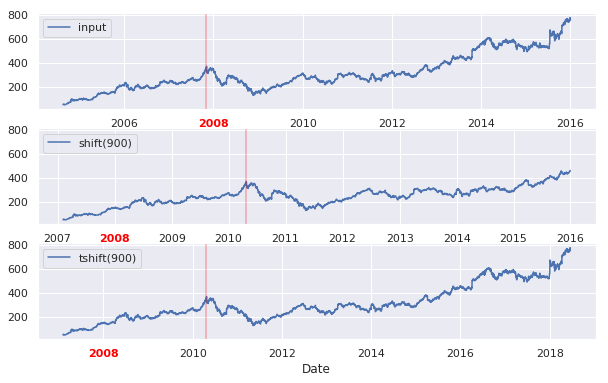

In [54]:
#对比 shift 与 tshift 方法
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0],figsize=(10, 6))
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

我们会发现, **shift(900) 将数据向前推进了 900 天**,这样图形中的一段就消失了(最左侧就变成了缺失值),而 **tshift(900) 方法是将时间索引值向前推进了 900 天**。

这类迁移方法的常见使用场景就是计算数据在不同时段的差异。例如,我们可以用迁移后的值来计算 Google 股票一年期的投资回报率(如图所示):

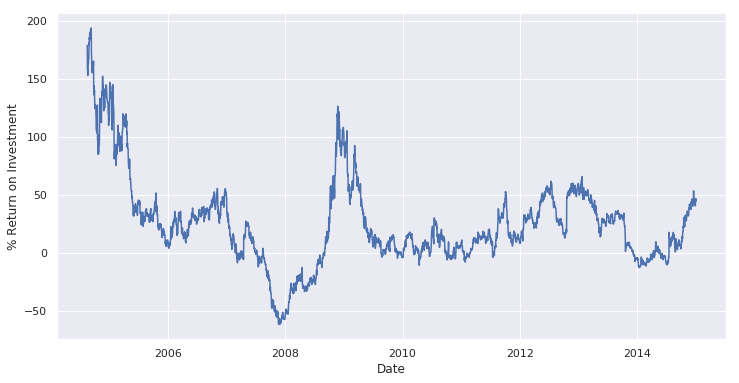

In [55]:
#Google 股票价格当期的投资回报率
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot(figsize=(12, 6))
plt.ylabel('% Return on Investment');

这可以帮助我们观察 Google 股票的总体特征:从图中可以看出,Google 的股票在 IPO 刚刚成功之后最值得投资(图里的趋势很直观),在 2009 年年中开始衰退。

#### shift函数测试
Series和DataFrame都有一个shift方法实现偏移，索引（index）不会被更改：

In [56]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.364343
2000-02-29    0.314898
2000-03-31   -0.790381
2000-04-30   -0.013043
Freq: M, dtype: float64

In [57]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.364343
2000-04-30    0.314898
Freq: M, dtype: float64

In [58]:
ts.shift(-2)

2000-01-31   -0.790381
2000-02-29   -0.013043
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

当我们进行位移的时候，就像上面这样会引入缺失值。

shift的一个普通的用法是计算时间序列的百分比变化，可以表示为：

In [59]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -1.864291
2000-03-31   -3.509954
2000-04-30   -0.983498
Freq: M, dtype: float64

因为普通的shift不会对index进行修改，一些数据会被丢弃。因此如果频度是已知的，可以把频度传递给shift，这样的话时间戳会自动变化：

In [60]:
ts

2000-01-31   -0.364343
2000-02-29    0.314898
2000-03-31   -0.790381
2000-04-30   -0.013043
Freq: M, dtype: float64

In [61]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.364343
2000-04-30    0.314898
Freq: M, dtype: float64

In [62]:
ts.shift(2, freq='M')

2000-03-31   -0.364343
2000-04-30    0.314898
2000-05-31   -0.790381
2000-06-30   -0.013043
Freq: M, dtype: float64

其他一些频度也可以导入，能让我们前后移动数据：

In [63]:
ts

2000-01-31   -0.364343
2000-02-29    0.314898
2000-03-31   -0.790381
2000-04-30   -0.013043
Freq: M, dtype: float64

In [64]:
ts.shift(3, freq='D')#月末往后推三天正好是3号

2000-02-03   -0.364343
2000-03-03    0.314898
2000-04-03   -0.790381
2000-05-03   -0.013043
dtype: float64

In [65]:
ts.shift(1, freq='90T')#T表示分钟。

2000-01-31 01:30:00   -0.364343
2000-02-29 01:30:00    0.314898
2000-03-31 01:30:00   -0.790381
2000-04-30 01:30:00   -0.013043
Freq: M, dtype: float64

#### 用偏移量来移动日期（Shifting dates with offsets）
pandas的日期偏移（date offset）能被用于datetime或Timestamp对象：

In [66]:
from pandas.tseries.offsets import Day, MonthEnd

In [67]:
now = datetime(2011, 11, 17)

如果我们添加一个像MonthEnd这样的anchored offset(依附偏移；锚点位置)，日期会根据频度规则进行递增：

In [68]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [69]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

依附偏移可以让日期向前或向后滚动，利用rollforward和rollback方法：

In [70]:
offset = MonthEnd()

In [71]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [72]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

一个比较创造性的日期偏移（date offset）用法是配合groupby一起用：

In [73]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.332685
2000-01-19    0.244212
2000-01-23   -2.543794
2000-01-27   -0.096858
2000-01-31   -1.441586
2000-02-04    0.489160
2000-02-08    0.329487
2000-02-12   -0.259463
2000-02-16   -0.771416
2000-02-20   -0.433268
2000-02-24   -0.262603
2000-02-28   -0.386615
2000-03-03   -0.274846
2000-03-07   -1.747229
2000-03-11   -0.525700
2000-03-15    2.234848
2000-03-19   -0.320090
2000-03-23    1.413187
2000-03-27    0.697933
2000-03-31   -0.567248
Freq: 4D, dtype: float64

In [74]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.834142
2000-02-29   -0.184960
2000-03-31    0.113857
dtype: float64

一个简单且快捷的方式是用resample：

In [75]:
ts.resample('M').mean()

2000-01-31   -0.834142
2000-02-29   -0.184960
2000-03-31    0.113857
Freq: M, dtype: float64

### 3. 移动时间窗口
Pandas 处理时间序列数据的第 3 种操作是移动统计值(rolling statistics)。这些指标可以通过 Series 和 DataFrame 的 rolling() 属性来实现,它会返回与 groupby 操作类似的结果。移动视图(rolling view)使得许多累计操作成为可能。

例如,可以通过下面的代码获取 Google 股票收盘价的一年期移动平均值和标准差(如图所示):

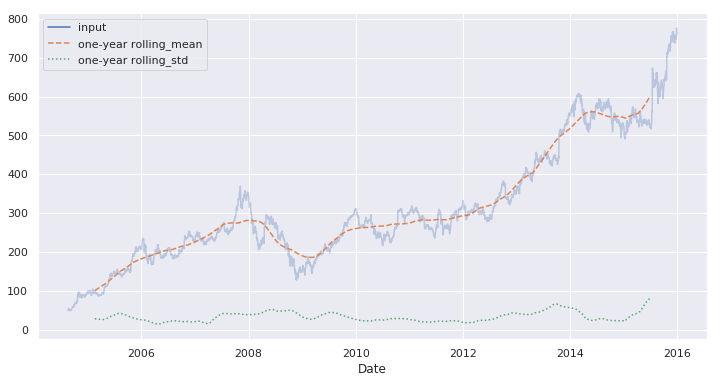

In [76]:
#Google 股票收盘价的移动统计值
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'],figsize=(12, 6))
ax.lines[0].set_alpha(0.3)

与 groupby 操作一样, aggregate() 和 apply() 方法都可以用来自定义移动计算。

## 案例 : 美国西雅图自行车统计数据的可视化( Example: Visualizing Seattle Bicycle Counts)
下面来介绍一个比较复杂的时间序列数据,统计自 2012 年以来每天经过美国西雅图弗 莱 蒙 特 桥(http://www.openstreetmap.org/#map=17/47.64813/-122.34965) 上 的 自 行 车 的 数 量,数据由安装在桥东西两侧人行道的传感器采集。小时统计数据可以在 http://data.seattle. gov/ 下载,还有一个数据集的直接下载链接 https://data.seattle.gov/Transportation/Fremont- Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k。

In [77]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

下好数据之后,可以用 Pandas 读取 CSV 文件获取一个 DataFrame 。我们将 Date 作为时间索引,并希望这些日期可以被自动解析:

In [78]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [79]:
data.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2016-12-06 00:00:00', '2016-01-22 20:00:00',
               '2017-04-04 01:00:00', '2013-01-18 04:00:00',
               '2017-01-12 04:00:00', '2016-02-29 00:00:00',
               '2013-09-13 03:00:00', '2016-12-07 00:00:00',
               '2013-03-29 04:00:00', '2017-05-24 01:00:00'],
              dtype='datetime64[ns]', name='Date', length=59832, freq=None)

In [80]:
data.shape

(59832, 2)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59832 entries, 2019-01-01 00:00:00 to 2017-05-24 01:00:00
Data columns (total 2 columns):
Fremont Bridge East Sidewalk    59823 non-null float64
Fremont Bridge West Sidewalk    59823 non-null float64
dtypes: float64(2)
memory usage: 1.4 MB


为了方便后面的计算,缩短数据集的列名,并新增一个 Total 列:

In [82]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

现在来看看这三列的统计值:

In [83]:
data.describe()

,West,East,Total
count,59823.000000,59823.000000,59823.000000
mean,52.619795,60.262324,112.882119
std,67.734326,87.871363,143.101423
min,0.000000,0.000000,0.000000
25%,6.500000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,73.000000,147.000000
max,698.000000,850.000000,1097.000000


### 1. 数据可视化
通过可视化,我们可以对数据集有一些直观的认识。先为原始数据画图(如图所示):

Text(0,0.5,'Hourly Bicycle Count')

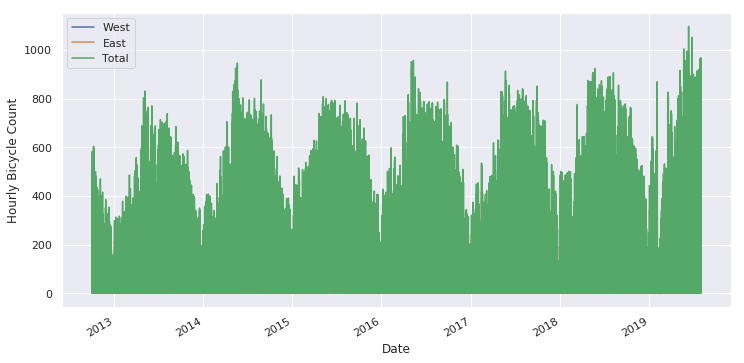

In [84]:
#弗莱蒙特桥每小时通行的自行车数量
data.plot(figsize=(12, 6))
plt.ylabel('Hourly Bicycle Count')

在图中显示大约 25 000 小时的样本数据对我们来说实在太多了,因此可以通过重新取样将数据转换成更大的颗粒度,比如按周累计(如图所示):

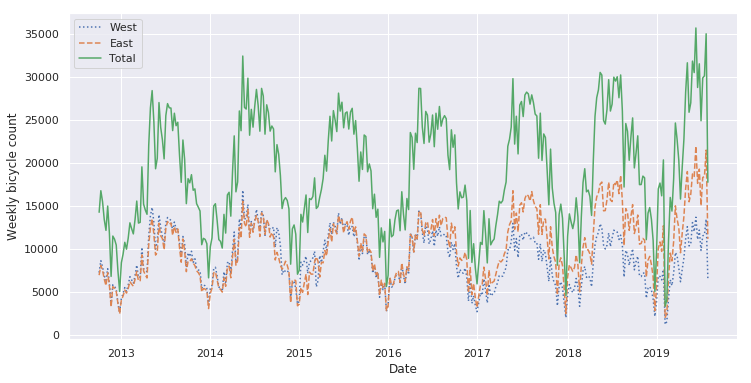

In [85]:
#弗莱蒙特桥每周通行的自行车数量
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'] ,figsize=(12, 6))
plt.ylabel('Weekly bicycle count');

这就显示出一些季节性的特征了。正如你所想,夏天骑自行车的人比冬天多,而且某个季节中每一周的自行车数量也在变化(可能与天气有关)。

另一种对数据进行累计的简便方法是用 pd.rolling_mean() 4 函数求移动平均值。下面将计算数据的 30 日移动均值,并让图形在窗口居中显示( center=True ，我感觉应该是时间重采样后日期在中间吧)(如图所示):

注：原书代码与正文不符。作者在正文中说“用 pd.rolling_meaning() 函数”,但作者代码中 daily.rolling (30,center=True).sum() 等价于 pd.rolling_sum()。 另外,Pandas 文档提到, pd.rolling_mean 方法即 将被废弃,用 DataFrame.rolling(center=False,window=D).mean() 的形式代替 pd.rolling_mean() 。考虑 到原文图题是“30 天自行车数量” ,因此按照 30 天的日均值作相应的修改。——译者注

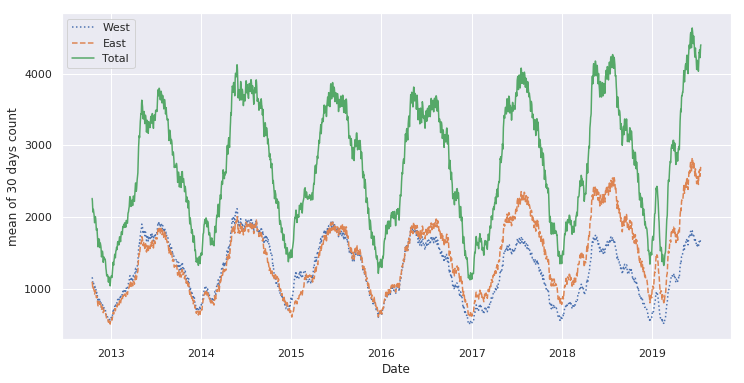

In [86]:
#每 30 日自行车的移动日均值
daily = data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'] ,figsize=(12, 6))
plt.ylabel('mean of 30 days count');

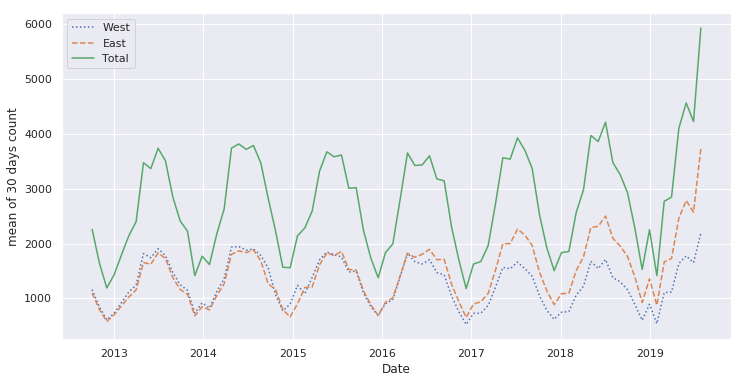

In [87]:
#每 30 日自行车的移动日均值
daily = data.resample('D').sum()
#感觉上rolling和resample的功能类似
#daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'] ,figsize=(12, 6))
daily.resample('30D').mean().plot(style=[':', '--', '-'] ,figsize=(12, 6))
plt.ylabel('mean of 30 days count');

我感觉错了，resample和rolling不一样，rolling后的数据明显比resample后的数据多

In [88]:
daily.rolling(30).mean().shape

(2493, 3)

In [89]:
daily.resample('30D').mean().shape

(84, 3)

In [90]:
daily.shape

(2493, 3)

由于窗口太小,现在的图形还不太平滑。我们可以用另一个移动均值的方法获得更平滑的图形,例如高斯分布时间窗口。下面的代码(可视化后如图所示)将设置窗口的宽度(选择 50 天)和窗口内高斯平滑的宽度(选择 10 天):

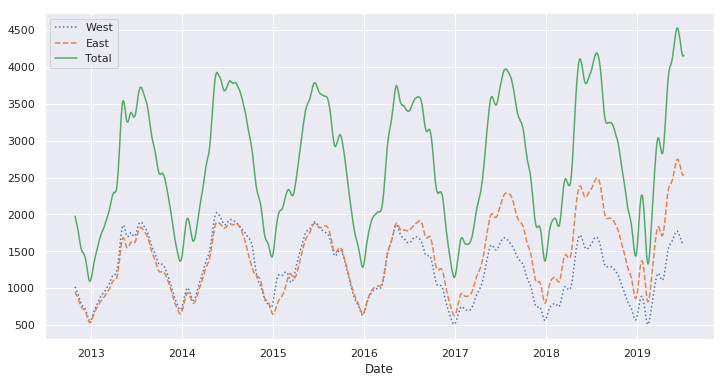

In [91]:
#用高斯平滑方法处理每周自行车的移动均值
daily.rolling(50, center=True,win_type='gaussian').mean(std=10).plot(
    style=[':', '--', '-'],figsize=(12, 6))

### 2. 深入挖掘数据
虽然我们已经从上图的平滑数据图观察到了数据的总体趋势,但是它们还隐藏了一些有趣的特征。例如,我们可能希望观察单日内的小时均值流量,这可以通过 GroupBy 操作来解决(如图所示):

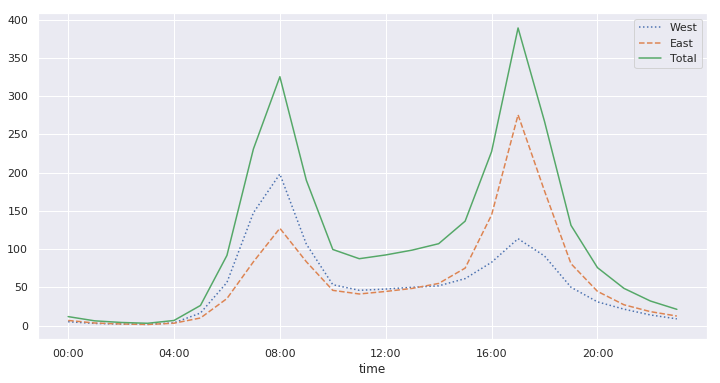

In [92]:
#每小时的自行车流量
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'],figsize=(12, 6))

In [93]:
by_time.head()

,West,East,Total
00:00:00,5.030084,6.699960,11.730044
01:00:00,2.817489,3.391897,6.209386
02:00:00,1.983521,2.100080,4.083601
03:00:00,1.557561,1.442439,3.000000
04:00:00,3.553149,3.114320,6.667469


In [94]:
by_time.tail()

,West,East,Total
19:00:00,50.098676,80.900521,130.999198
20:00:00,30.993181,44.725632,75.718813
21:00:00,21.462495,27.192940,48.655435
22:00:00,13.889691,18.224629,32.114320
23:00:00,8.767349,12.456478,21.223827


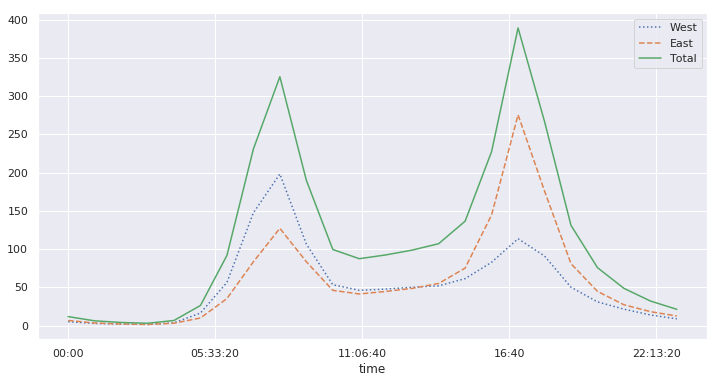

In [95]:
#不设置xticks属性试试
by_time.plot(style=[':', '--', '-'],figsize=(12, 6))

小时均值流量呈现出十分明显的双峰分布特征,早间峰值在上午 8 点,晚间峰值在下午 5 点。 这充分反映了过桥上下班往返自行车流量的特征。进一步分析会发现,桥西的高峰在早上(因 为人们每天会到西雅图的市中心上班) ,而桥东的高峰在下午(下班再从市中心离开) 。

我们可能还会对周内每天的变化产生兴趣,这时依然可以通过一个简单的 groupby 来实现(如图所示):

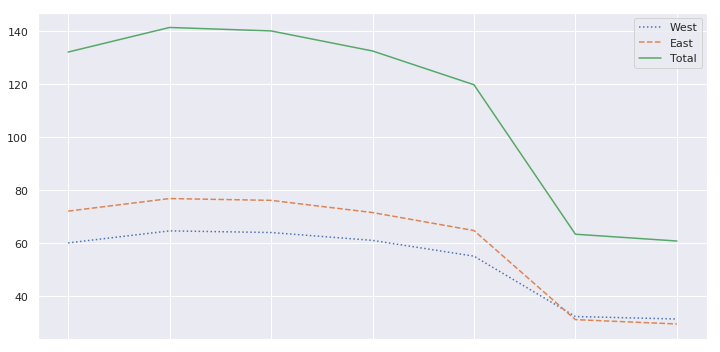

In [96]:
#每周每天的自行车流量
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'],figsize=(12, 6));

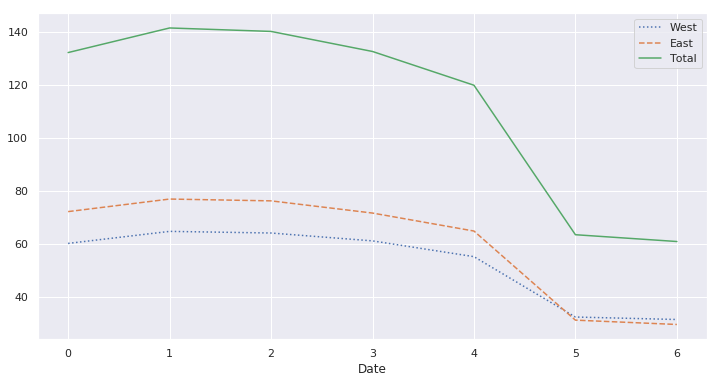

In [97]:
data.groupby(data.index.dayofweek).mean().plot(style=[':', '--', '-'],figsize=(12, 6));

In [98]:
data.index.dayofweek

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 4, 1, 4, 3, 0, 4, 2, 4, 2],
           dtype='int64', name='Date', length=59832)

In [99]:
data.index.dayofweek.unique()

Int64Index([1, 6, 2, 5, 0, 3, 4], dtype='int64', name='Date')

In [100]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(0, 0), datetime.time(4, 0), datetime.time(1, 0)],
      dtype=object)

In [101]:
#data.index.time 报错，ndarray没有这个方法
data.index.hour.unique()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Date')

In [102]:
data.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
             6, 22,  4, 18, 12, 29, 13,  7, 29, 24],
           dtype='int64', name='Date', length=59832)

In [103]:
data.index.day.unique()

Int64Index([ 1, 15,  2,  3, 29,  9, 26, 13,  4, 11,  5, 19,  6,  7, 20,  8, 18,
            21, 10, 25, 12, 14, 16, 31, 17, 22, 23, 24, 27, 28, 30],
           dtype='int64', name='Date')

工作日与周末的自行车流量差十分显著,周一到周五通过的自行车差不多是周六、周日的两倍。

看到这个特征之后,让我们用一个复合 groupby 来观察一周内工作日与双休日每小时的数据。用一个标签表示双休日和工作日的不同小时:

In [104]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
by_time.head()

West      East     Total
Weekday 00:00:00  4.280741  5.551376  9.832117
        01:00:00  2.234138  2.623807  4.857945
        02:00:00  1.621561  1.632791  3.254351
        03:00:00  1.450309  1.317238  2.767546
        04:00:00  4.304885  3.419427  7.724312

现在用一些 Matplotlib 工具画出两张图(如图所示):

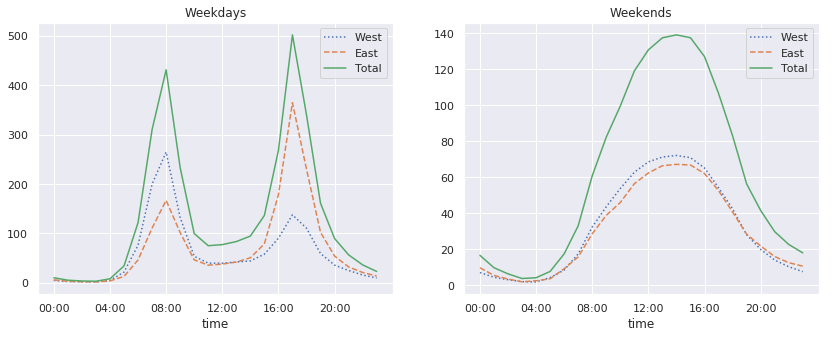

In [105]:
#工作日与双休日每小时的自行车流量
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

结果很有意思,我们会发现工作日的自行车流量呈双峰通勤模式(bimodal commute pattern) , 而到了周末就变成了单峰娱乐模式(unimodal recreational pattern) 。假如继续挖掘数据应该还 会发现更多有趣的信息,比如研究天气、温度、一年中的不同时间以及其他因素对人们通勤 模式的影响。关于更深入的分析内容,请参考我的博文“Is Seattle Really Seeing an Uptick In (https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/) , Cycling?” 里面用数据的子集作了一些分析。